In [57]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = r".\\DataSet\\"

c:\Users\chiar\OneDrive\Desktop\Progetto2DataScience\DataScience2Project


In [58]:
allMadrid = pd.read_csv(path+"out.csv")
#allMadrid = pd.read_csv(path+"\madrid_2008.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [59]:
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'SO_2', 'TCH', 'TOL', 'PM25', 'station'], axis=1)
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'OXY', 'O_3', 'PXY', 'TCH', 'TOL', 'station'], axis=1)
allMadrid = allMadrid.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
allMadrid['date'] = pd.to_datetime(allMadrid['date'], errors='coerce')
allMadrid = allMadrid[(allMadrid['date'].dt.year < 2017)]
print(allMadrid)
#allMadrid.head()

                       date         NO        NO_2       PM10  PM25   SO_2
0       2008-06-01 01:00:00  11.820078   83.089996  16.889999  10.4   8.98
1       2008-06-01 01:00:00  11.820078   94.820000  19.040001   NaN   5.85
2       2008-06-01 01:00:00  11.820078   75.919998  20.270000   NaN   6.95
3       2008-06-01 01:00:00  11.820078   61.029999  10.850000   NaN   5.96
4       2008-06-01 01:00:00  11.820078  105.199997  37.160000  21.9  10.92
...                     ...        ...         ...        ...   ...    ...
1911667 2016-07-01 00:00:00   2.000000   29.000000        NaN   NaN    NaN
1911668 2016-07-01 00:00:00   1.000000   29.000000  36.000000   NaN   5.00
1911669 2016-07-01 00:00:00   1.000000   19.000000        NaN   NaN    NaN
1911670 2016-07-01 00:00:00   6.000000   17.000000        NaN   NaN    NaN
1911671 2016-07-01 00:00:00   2.000000   46.000000  34.000000   NaN    NaN

[1911648 rows x 6 columns]


In [60]:
# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
allMadrid['date'] = pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m-%d'))
print(allMadrid['date'])

0         2008-06-01
1         2008-06-01
2         2008-06-01
3         2008-06-01
4         2008-06-01
             ...    
1911667   2016-07-01
1911668   2016-07-01
1911669   2016-07-01
1911670   2016-07-01
1911671   2016-07-01
Name: date, Length: 1911648, dtype: datetime64[ns]


In [61]:
#raggruppo per station
allMadrid = allMadrid.groupby(['date']).mean()
allMadrid = allMadrid.reset_index(drop=True)
print(allMadrid.columns)

Index(['NO', 'NO_2', 'PM10', 'PM25', 'SO_2'], dtype='object')


In [62]:
allMadrid.head()

,NO,NO_2,PM10,PM25,SO_2
0,11.820078,67.084565,39.855419,25.650870,19.815357
1,11.820078,66.552372,21.005401,15.767895,14.897970
2,11.820078,50.410930,9.173423,5.617396,10.923919
3,11.820078,58.247292,21.390939,13.236000,12.875144
4,11.820078,47.282292,18.745682,12.485729,11.804503


In [63]:
allMadrid = allMadrid.dropna(subset=['NO_2'])
Livello = allMadrid['NO_2']
#allMadrid = allMadrid.dropna()
allMadrid = allMadrid.drop(['NO_2'], axis=1)
allMadrid.head()

,NO,PM10,PM25,SO_2
0,11.820078,39.855419,25.650870,19.815357
1,11.820078,21.005401,15.767895,14.897970
2,11.820078,9.173423,5.617396,10.923919
3,11.820078,21.390939,13.236000,12.875144
4,11.820078,18.745682,12.485729,11.804503


In [64]:
print(allMadrid)

              NO       PM10       PM25       SO_2
0      11.820078  39.855419  25.650870  19.815357
1      11.820078  21.005401  15.767895  14.897970
2      11.820078   9.173423   5.617396  10.923919
3      11.820078  21.390939  13.236000  12.875144
4      11.820078  18.745682  12.485729  11.804503
...          ...        ...        ...        ...
3283  122.225694  24.361345  16.260563  14.958333
3284   92.600694  23.120172  15.549296  12.025000
3285  127.262153  30.190265  20.529851  13.125000
3286  139.501736  30.176471  20.859155  14.795833
3287   68.236111  23.860759  21.576389  11.016667

[3288 rows x 4 columns]


In [65]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

allMadrid = allMadrid.astype(int)
#print(allMadrid['PM10'])

In [66]:
allMadrid.head()

,NO,PM10,PM25,SO_2
0,11,39,25,19
1,11,21,15,14
2,11,9,5,10
3,11,21,13,12
4,11,18,12,11


In [67]:
condition_list = [(Livello <= 30), ((Livello > 30) & (Livello <= 50)), (Livello > 50)]

choicelist = [0,1,2] 

Livello = np.select(condition_list, choicelist, default='Non Specificato')

Livello = Livello.astype(int)

print(Livello)

[2 2 2 ... 2 2 2]


In [68]:
allMadrid = pd.get_dummies(allMadrid)
allMadrid.head()

,NO,PM10,PM25,SO_2
0,11,39,25,19
1,11,21,15,14
2,11,9,5,10
3,11,21,13,12
4,11,18,12,11


In [69]:
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(allMadrid[["NO", "PM10", "PM25", "SO_2"]])
allMadrid[["NO", "PM10", "PM25", "SO_2"]] = scaled_d
allMadrid.head()

,NO,PM10,PM25,SO_2
0,0.041667,0.165899,0.403509,0.642857
1,0.041667,0.082949,0.228070,0.464286
2,0.041667,0.027650,0.052632,0.321429
3,0.041667,0.082949,0.192982,0.392857
4,0.041667,0.069124,0.175439,0.357143


In [70]:
allMadrid.head()

,NO,PM10,PM25,SO_2
0,0.041667,0.165899,0.403509,0.642857
1,0.041667,0.082949,0.228070,0.464286
2,0.041667,0.027650,0.052632,0.321429
3,0.041667,0.082949,0.192982,0.392857
4,0.041667,0.069124,0.175439,0.357143


In [71]:
#separazione da tollerabile a non_tollerabile
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == 2]
tollerabile = allMadrid[allMadrid.Livello == 0]
parz_tollerabile = allMadrid[allMadrid.Livello == 1]

print("Tollerabili: ", len(tollerabile), "Parzialmente tollerabili: ", len(parz_tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  883 Parzialmente tollerabili:  1366 Non tollerabili:  1039


In [72]:
#bilanciamento del dataset
balanced_d = pd.concat([tollerabile, parz_tollerabile.sample(len(tollerabile)), non_tollerabile.sample(len(tollerabile))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(2649, 5)

ANALISI DELLE CORRELAZIONI

<Figure size 2160x1080 with 0 Axes>

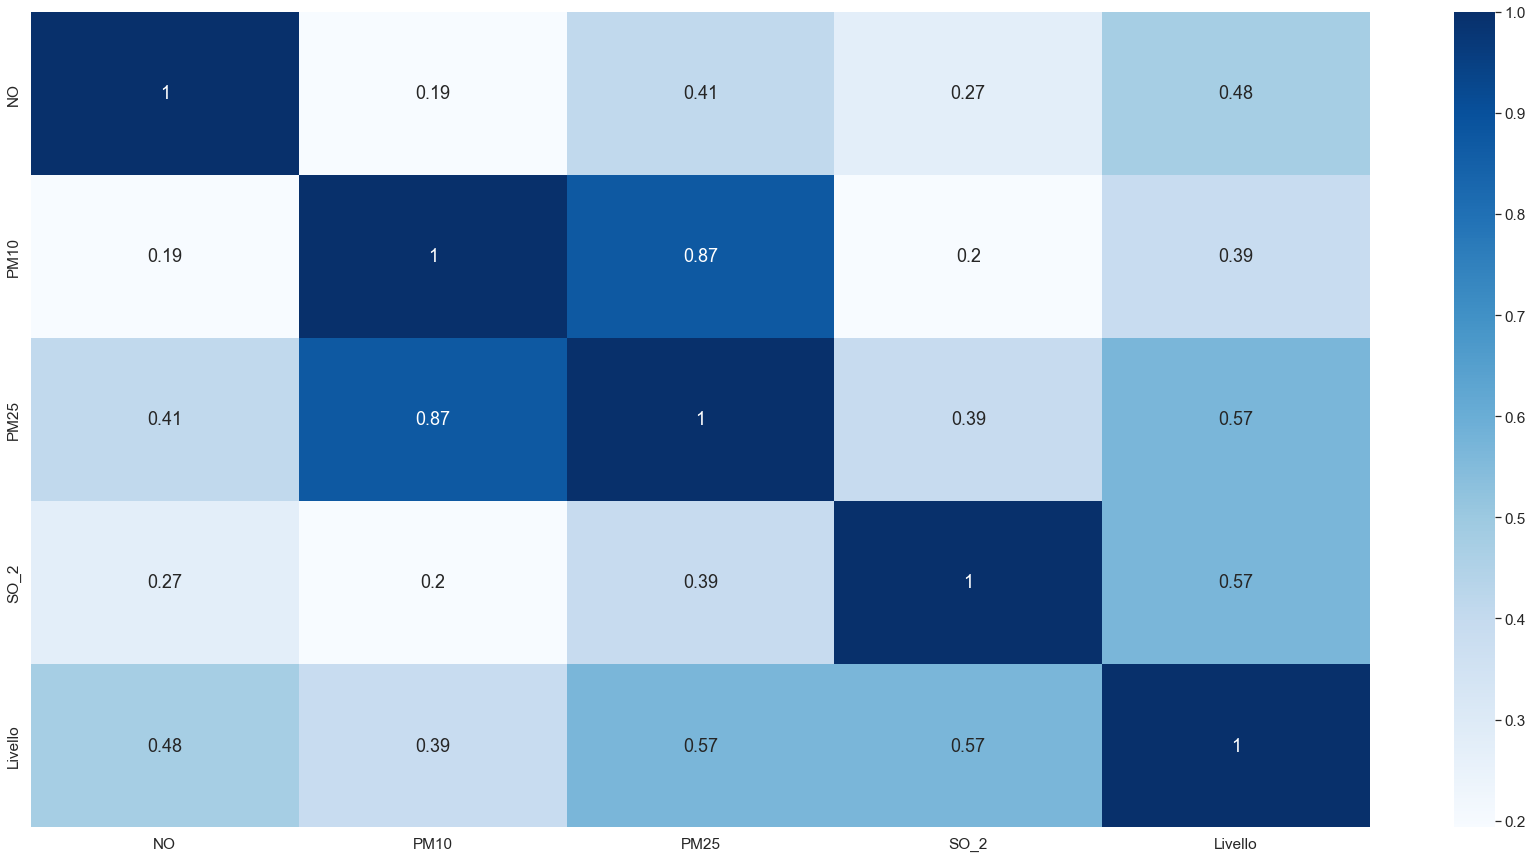

In [73]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(allMadrid[allMadrid.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [74]:
# tolgo il PM25 perchè ha elevata correlazione
x = x.drop(['PM25'], axis=1)

<Figure size 2160x1080 with 0 Axes>

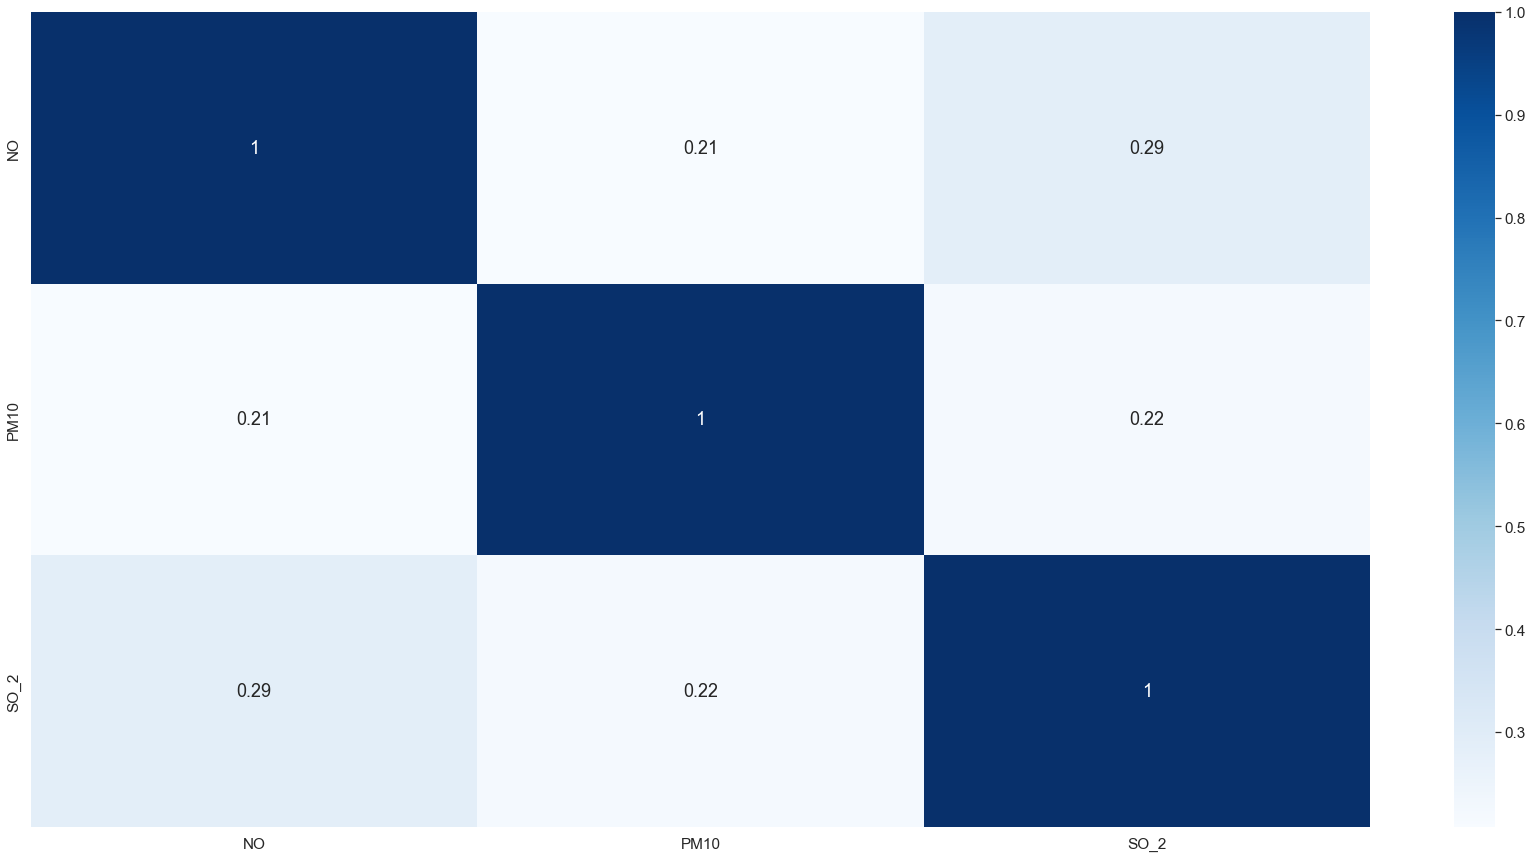

In [75]:
plt.figure(figsize=(30,15))

#x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

CLASSIFICAZIONE MULTICLASSE

In [76]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2119, 3)
(530, 3)
(2119, 1)
(530, 1)


In [77]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

In [78]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.73 	 ---> LogisticRegression 
Accuracy: 0.74 	 ---> DecisionTreeClassifier 
Accuracy: 0.76 	 ---> RandomForestClassifier 
Accuracy: 0.79 	 ---> GradientBoostingClassifier 
Accuracy: 0.76 	 ---> AdaBoostClassifier 
Accuracy: 0.68 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.8 	 ---> SVC 


Text(0.5, 1.0, 'Cross validation scores')

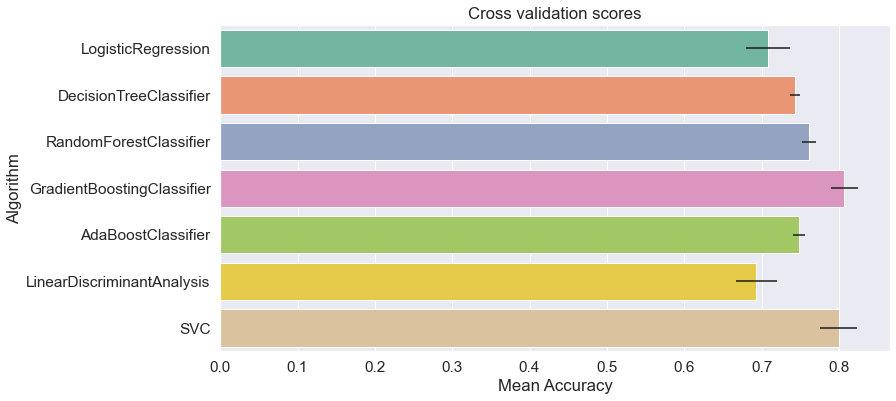

In [79]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

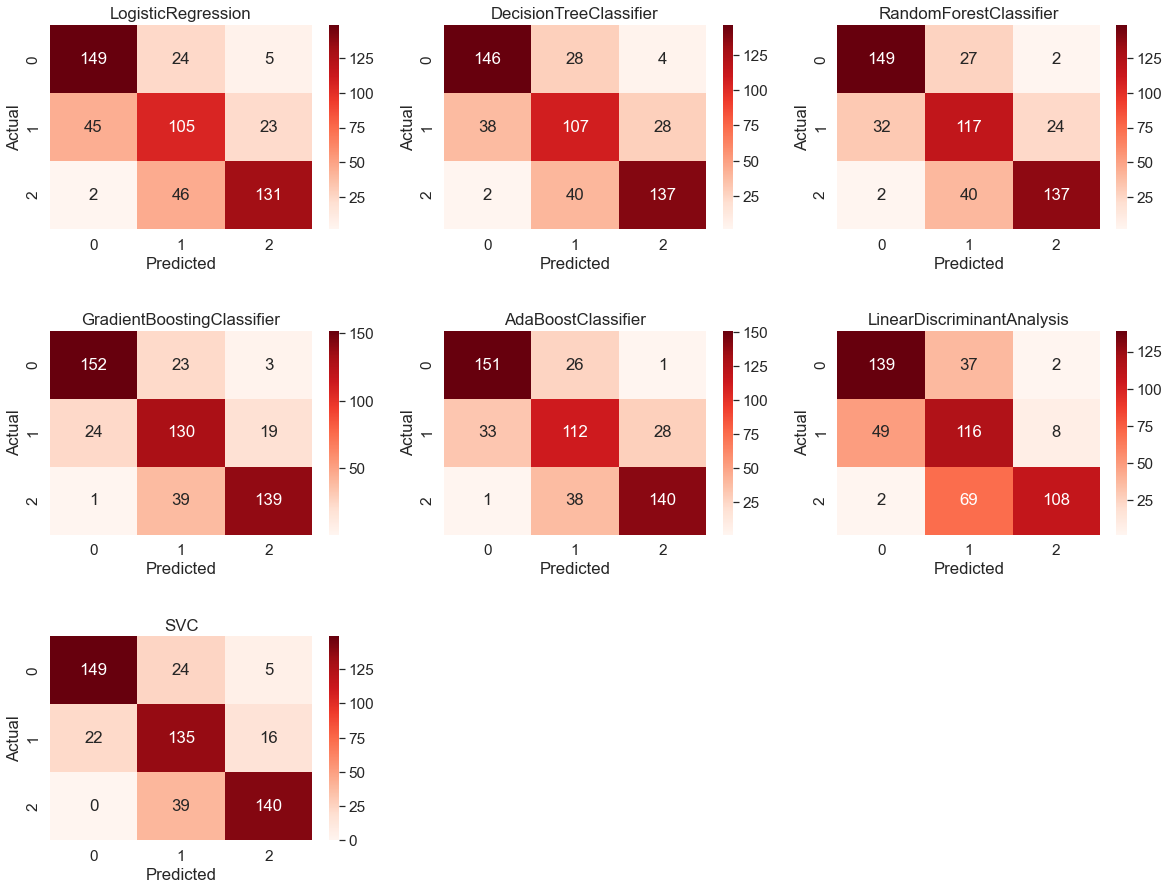

In [80]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [81]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       178
           1       0.60      0.61      0.60       173
           2       0.82      0.73      0.78       179

    accuracy                           0.73       530
   macro avg       0.73      0.73      0.73       530
weighted avg       0.73      0.73      0.73       530

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       178
           1       0.61      0.62      0.61       173
           2       0.81      0.77      0.79       179

    accuracy                           0.74       530
   macro avg       0.74      0.73      0.73       530
weighted avg       0.74      0.74      0.74       530

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      

In [82]:
# Search grid for optimal parameters. Si vanno a testare tutte le possibili combinazioni di iperparametri

#DecisionTree Iperparametri
DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

#GradientBoosting Iperparametri
GB_param = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1]}

#SVC_param = {'C':[1,10,100,1000],
#             'gamma':[1,0.1,0.001,0.0001], 
#             'kernel':['linear','rbf']}

#RF_param = {"max_depth": [None],
#            "max_features": [0.3, 0.7, 1],
#            "min_samples_split": [2, 3, 10],
#            "min_samples_leaf": [1, 3, 10],
#            "bootstrap": [False],
#            "n_estimators" :[100,300],
#            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
GBgs = GridSearchCV(GradientBoostingClassifier(), param_grid=GB_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, GBgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train.values.ravel())
    gs_model.append(model.best_estimator_) #si salva il miglior modello
    score.append(model.best_score_) #si salva lo score

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [83]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[1], 3), round(cv_acc[3], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[1], 3))

score without GridSearchCV:  0.743 0.807
score with GridSearchCV:  0.797 0.811


Index(['Livello', 'LogisticRegression', 'DecisionTreeClassifier',
       'RandomForestClassifier', 'GradientBoostingClassifier',
       'AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'SVC'],
      dtype='object')


Text(0.5, 1.0, 'Correlation between models')

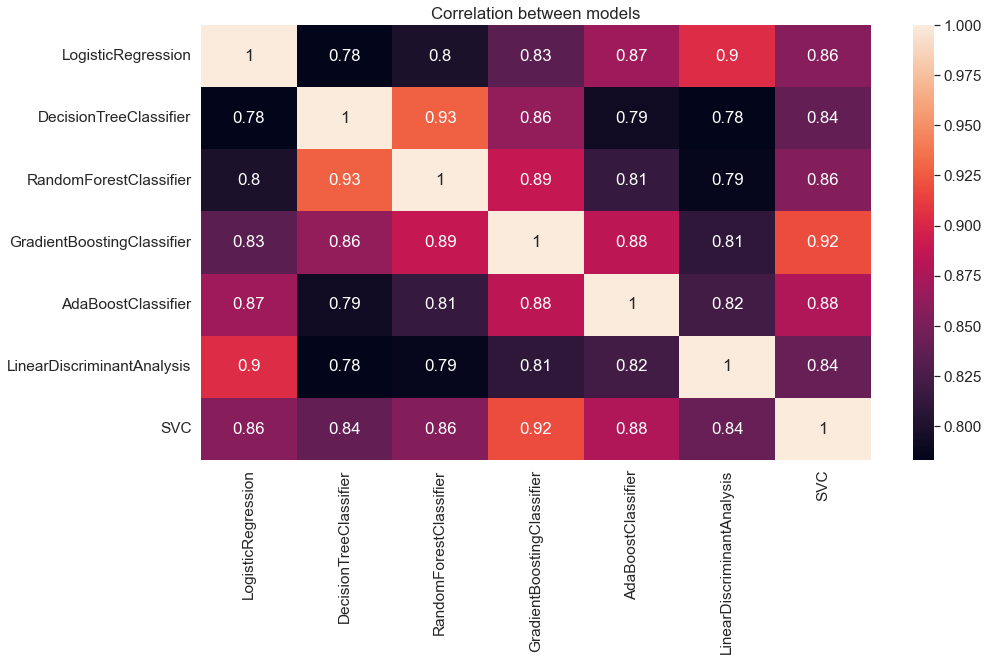

In [84]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
print(model_results.columns)
sns.heatmap(model_results.drop("Livello", axis=1).corr(),annot=True)
plt.title("Correlation between models")

MODEL ENSEMBLE

In [85]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train.values.ravel())
print(accuracy_score(y_test,best_model.predict(x_test)))

0.7981132075471699


TESTING DEL MODELLO

In [86]:
allMadrid_test = pd.read_csv(path+"out.csv")
allMadrid_test = allMadrid_test.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'], errors='coerce')
allMadrid_test = allMadrid_test[(allMadrid_test['date'].dt.year > 2016)]

# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
allMadrid_test['date'] = pd.to_datetime(allMadrid_test['date'].dt.strftime('%Y-%m-%d'))

#raggruppo per station
allMadrid_test = allMadrid_test.groupby(['date']).mean()
allMadrid_test = allMadrid_test.reset_index(drop=True)

allMadrid_test = allMadrid_test.dropna(subset=['NO_2'])
Livello_test = allMadrid_test['NO_2']
#allMadrid = allMadrid.dropna()
allMadrid_test = allMadrid_test.drop(['NO_2'], axis=1)

for col in allMadrid_test.columns:
    if allMadrid_test[col].dtype != object:
        allMadrid_test[col]=allMadrid_test[col].fillna(allMadrid_test[col].mean())

allMadrid_test = allMadrid_test.astype(int)

condition_list = [(Livello_test <= 30), ((Livello_test > 30) & (Livello_test <= 50)), (Livello_test > 50)]
choicelist = [0,1,2] 
Livello_test = np.select(condition_list, choicelist, default='Non Specificato')
Livello_test = Livello_test.astype(int)

allMadrid_test = pd.get_dummies(allMadrid_test)

scaler_test = MinMaxScaler()
scaled_d_test = scaler_test.fit_transform(allMadrid_test[["NO", "PM10", "PM25", "SO_2"]])
allMadrid_test[["NO", "PM10", "PM25", "SO_2"]] = scaled_d_test

# Drop values to avoid multicolinearity
allMadrid_test = allMadrid_test.drop(['PM25'], axis=1)

In [87]:
print(allMadrid_test)

           NO      PM10      SO_2
0    0.192982  0.159722  0.538462
1    0.169591  0.159722  0.615385
2    0.450292  0.243056  0.692308
3    0.614035  0.270833  0.692308
4    0.473684  0.215278  0.538462
..        ...       ...       ...
481  0.029240  0.166667  0.076923
482  0.000000  0.055556  0.076923
483  0.000000  0.027778  0.076923
484  0.011696  0.027778  0.076923
485  0.000000  0.013889  0.153846

[486 rows x 3 columns]


In [88]:
livello_pred = pd.Series(best_model.predict(allMadrid_test), name='Livello_test')

In [89]:
livello_pred.value_counts()

2    192
1    155
0    139
Name: Livello_test, dtype: int64

YELLOWBRIK

In [90]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

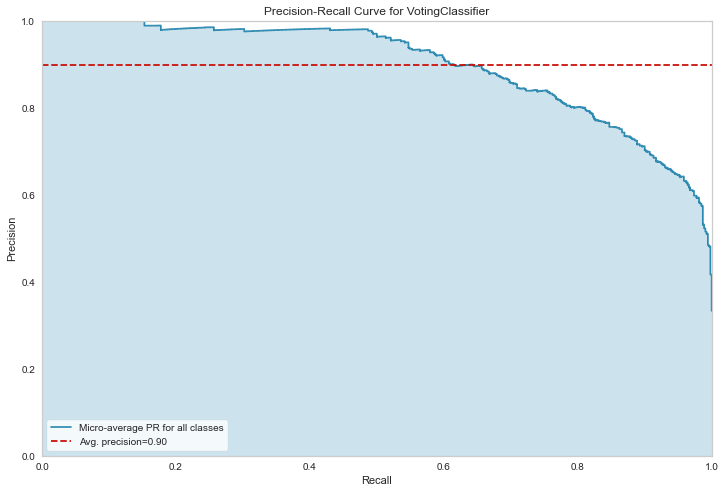

<AxesSubplot:title={'center':'Precision-Recall Curve for VotingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [91]:
plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

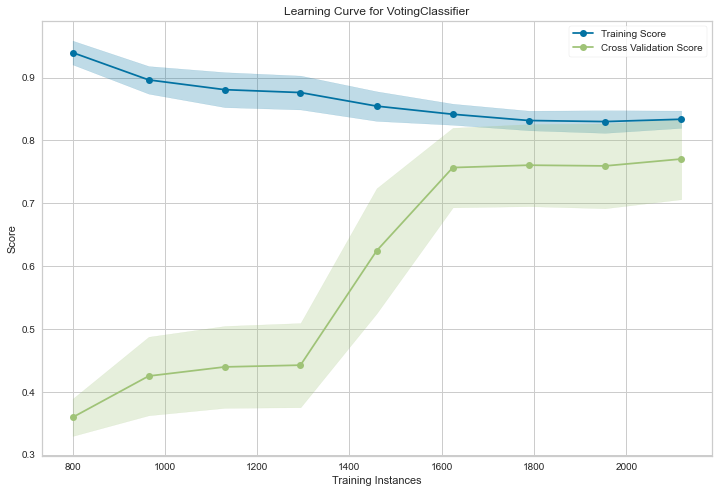

<AxesSubplot:title={'center':'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [92]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure